In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import pickle


In [2]:
import pandas as pd
import numpy as np

hypothalamus_path = 'hypothalamus.txt'
liver_path = 'liver.txt'
genotypes_path = 'BXD.geno'

hypothalamus_expression_df = pd.read_csv(hypothalamus_path,
                                         sep='\t',
                                         comment='#',
                                         index_col=0,
                                         )
liver_expression_df = pd.read_csv(liver_path,
                                         sep='\t',
                                         comment='#',
                                         index_col=0,
                                         )
#hypothalamus_expression_df.columns = hypothalamus_expression_df.iloc[0]
hypothalamus_expression_df = hypothalamus_expression_df[1:]
liver_expression_df = liver_expression_df[1:]

/Users/d_private/anaconda3/envs/PyProgAll/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3071: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
/Users/d_private/anaconda3/envs/PyProgAll/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3071: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,

In [3]:
hypothalamus_expression_df_no_metadata = hypothalamus_expression_df.iloc[33:,:]
hypothalamus_expression_df_no_metadata

,BXD44_F,BXD49_M,BXD44_M,BXD102_M,BXD43_M,BXD45_F,BXD45_M,BXD103_M,BXD103_F,BXD60_F,...,BXD92A_F,BXD70_F,BXD92A_M,BXD68_F,BXD68_M,BXD79_F,BXD85_F,BXD85_M,BXD101_M,BXD101_F
!Sample_title,,,,,,,,,,,,,,,,,,,,,
10338001,12.612,12.509,12.629,12.56,12.533,12.646,12.426,12.465,12.728,12.429,...,12.451,12.812,12.757,12.697,12.943,12.622,12.963,12.522,12.558,12.872
10338003,11.187,11.043,11.116,11.104,11.09,11.151,10.955,11.06,11.256,10.968,...,10.975,11.304,11.207,11.246,11.445,11.15,11.539,10.98,11.093,11.314
10338004,10.021,9.627,9.875,9.817,10.031,9.906,9.766,9.881,10.064,9.78,...,9.83,9.929,9.972,9.929,10.065,9.772,9.973,9.926,9.799,10.021
10338017,13.598,13.342,13.509,13.518,13.495,13.516,13.4,13.42,13.594,13.385,...,13.562,13.723,13.667,13.543,13.811,13.482,13.651,13.559,13.575,13.827
10338025,9.937,9.654,9.743,9.868,9.854,9.866,9.719,9.799,9.948,9.875,...,9.866,10,9.892,10.007,10.092,9.809,10.074,9.828,9.967,10.035
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10608720,9,9.033,9.154,8.93,9.274,8.834,9.065,9.121,9.103,9.127,...,9.085,9.136,9.199,9.265,9.126,9.092,9.342,8.994,9.025,9.337
10608721,9.121,9.608,9.108,9.218,8.926,9.228,9.177,9.078,9.042,9.082,...,9.09,9.185,8.891,9.319,9.483,9.093,8.923,9.135,9.028,8.967
10608722,5.691,5.466,5.591,5.674,5.831,5.541,5.618,5.604,5.553,5.504,...,5.522,5.379,5.525,5.573,5.323,5.61,5.621,5.657,5.591,5.336


In [36]:
# liver_expression_df = liver_expression_df.loc[hypothalamus_expression_df.loc[hypothalamus_expression_df.apply(lambda row: type(row.name) != int, axis = 1)]]

liver_expression_df_no_metadata = liver_expression_df.iloc[46:-1,:]


In [37]:
# Set minimal maximal expression value to be the .025 percentile of all maximal values

# Liver data 
liver_expression_df_no_metadata = liver_expression_df_no_metadata.apply(lambda col: col.astype(float))
thr = liver_expression_df_no_metadata.max(axis = 1).quantile(.025)
mask = liver_expression_df_no_metadata.apply(lambda row: row.max() > thr, axis = 1)
liver_expression_df_no_metadata = liver_expression_df_no_metadata.loc[mask]

# Hypo data
hypothalamus_expression_df_no_metadata = hypothalamus_expression_df_no_metadata.apply(lambda col: col.astype(float))
thr = hypothalamus_expression_df_no_metadata.max(axis = 1).quantile(.025)
mask = hypothalamus_expression_df_no_metadata.apply(lambda row: row.max() > thr, axis = 1)
hypothalamus_expression_df_no_metadata = hypothalamus_expression_df_no_metadata.loc[mask]




In [38]:
# Set minimal expression variance per row to be the .1 percentile of all variance values

# Liver data 
print(liver_expression_df_no_metadata.shape)
thr = liver_expression_df_no_metadata.var(axis = 1).quantile(.1)
mask = liver_expression_df_no_metadata.apply(lambda row: row.var() > thr, axis = 1)
liver_expression_df_no_metadata = liver_expression_df_no_metadata.loc[mask]
print(liver_expression_df_no_metadata.shape)
'''
# Hypo data
hypothalamus_expression_df_no_metadata = hypothalamus_expression_df_no_metadata.apply(lambda col: col.astype(float))
thr = hypothalamus_expression_df_no_metadata.max(axis = 1).quantile(.025)
mask = hypothalamus_expression_df_no_metadata.apply(lambda row: row.max() > thr, axis = 1)
hypothalamus_expression_df_no_metadata = hypothalamus_expression_df_no_metadata.loc[mask]

'''


(20346, 122)
(18311, 122)


'\n# Hypo data\nhypothalamus_expression_df_no_metadata = hypothalamus_expression_df_no_metadata.apply(lambda col: col.astype(float))\nthr = hypothalamus_expression_df_no_metadata.max(axis = 1).quantile(.025)\nmask = hypothalamus_expression_df_no_metadata.apply(lambda row: row.max() > thr, axis = 1)\nhypothalamus_expression_df_no_metadata = hypothalamus_expression_df_no_metadata.loc[mask]\n\n'

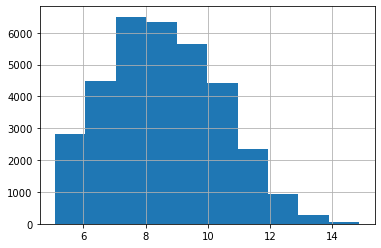

In [7]:
hypothalamus_expression_df_no_metadata.max(axis = 1).hist()

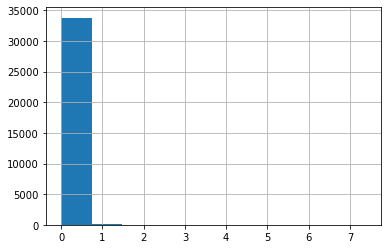

In [9]:
hypothalamus_expression_df_no_metadata.var(axis = 1).hist()

In [16]:
thr = hypothalamus_expression_df_no_metadata.var(axis = 1).quantile(.1)

0.010018711797752818

(0.0, 0.1)

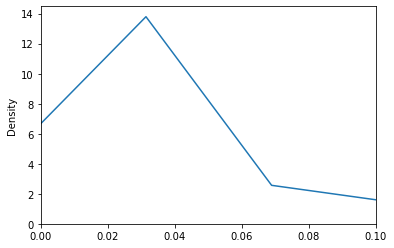

In [19]:
sns.kdeplot(data=hypothalamus_expression_df_no_metadata.var(axis = 1)).set_xlim([0,.1])

In [20]:
hypothalamus_expression_df_no_metadata.shape

(33890, 89)

###  Load regression results

In [2]:
ls

BXD.geno          drors_work.ipynb  liver_eqtl.pkl    preprocessing.py
__pycache__/      hypothalamus.txt  main.py
docs/             liver.txt         phenotypes.xls


In [6]:

res = pd.read_pickle('/Users/d_private/_git/system_genetics/bin/liver_eqtl.pkl')

In [11]:
with open('bin/liver_eqtl.pkl','rb') as f:
    liver_eqtl_results = pickle.load(f)

In [10]:
liver_eqtl_results

AttributeError: 'DataFrame' object has no attribute '_data'

In [12]:
type(res)

pandas.core.frame.DataFrame

In [23]:
res = pd.read_pickle('/Users/d_private/_git/system_genetics/bin/liver_eqtl.pkl')

In [24]:
res.head(5)

RecursionError: maximum recursion depth exceeded while calling a Python object

In [27]:
import sys
sys.getrecursionlimit()

3000